<a href="https://colab.research.google.com/github/LilySu/DataViz/blob/master/Covid_19_NYC_2020_03_08ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import geopandas as gpd
# !pip install descartes
# !pip install seaborn
# !pip install folium
# !pip install geopandas
# !pip install shapely
!pip install pyshp

     |████████████████████████████████| 225kB 2.8MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=7e2cfc11e8c4feb8d32f679b69fb2c89d2824526b57b1e6c556a473c65fee296
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp


In [0]:
# conda install -c conda-forge descartes
# import sys
# # !conda install geopandas
# # import sys
# !{sys.executable} -m pip install geopandas
# sys.executable
# !conda install seaborn

In [0]:
# extra_path = os.path.join(sys.prefix, 'site-packages')
# if os.path.isdir(extra_path) and extra_path not in sys.path:
#     sys.path.append(extra_path)

In [0]:
from math import radians, cos, sin, asin, sqrt, atan2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# from pylab import rcParams
# import seaborn as sns
# import folium
# import spectra
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
roads_path = '/content/drive/My Drive/Colab Notebooks/Maps/geo_export_904a2c75-927b-4dd2-8a70-a9e5e1b2c338.shp'

In [0]:
# roads_path = "C:\\Users\\lilyx\\Snow\\geo_export_f228d8dc-f743-4360-a2cd-bcbfc02c0375.shp"
roads = gpd.read_file(roads_path, encoding='utf-8')
roads.shape

(109583, 10)

In [0]:
# roads = roads.sample(109583)

In [0]:
roads['snow_prior'] = roads['snow_prior'].replace({"C": "Critical Routes: Highways, bus routes that connect to Hospitals, EMS, FDNY, NYPD and schools", "V":"Not serviced during snow events by DSNY.", "S":"Sector Routes: Streets wide enough for a full size trash truck with a plow attached.", "H":"Haulster Routes: Dead ends and streets that cannot be serviced with truck."})
roads = roads.sort_values("borough")
roads.sample(10)

,borough,district,objectid,physical_i,roadway_ty,segment_le,shape_leng,snow_prior,street_nam,geometry
77792,QW,QW01,77796.0,24665.0,1.0,246.391211,246.391146,Sector Routes: Streets wide enough for a full ...,30 AV,"LINESTRING (-73.90544 40.75960, -73.90510 40.7..."
80013,QE,QE12,80017.0,83925.0,1.0,496.755668,496.755630,Not serviced during snow events by DSNY.,CLAYTON RD,"LINESTRING (-73.79483 40.70270, -73.79326 40.7..."
87478,QE,QE14,87482.0,81146.0,1.0,240.378936,240.378920,Sector Routes: Streets wide enough for a full ...,DEERFIELD RD,"LINESTRING (-73.76150 40.59733, -73.76236 40.5..."
61166,BKS,BKS14,61170.0,39618.0,1.0,385.832333,385.832449,"Critical Routes: Highways, bus routes that con...",FOSTER AV,"LINESTRING (-73.97403 40.62881, -73.97285 40.6..."
65539,BKN,BKN09,66543.0,47300.0,1.0,806.116435,806.116448,"Critical Routes: Highways, bus routes that con...",PARKSIDE AV,"LINESTRING (-73.95016 40.65627, -73.94727 40.6..."
89774,QW,QW01,88778.0,23188.0,1.0,108.283101,108.283116,Sector Routes: Streets wide enough for a full ...,37 ST,"LINESTRING (-73.91243 40.76975, -73.91265 40.7..."
57074,MN,MN11,57078.0,1577.0,2.0,626.050890,626.050986,"Critical Routes: Highways, bus routes that con...",FRANKLIN D ROOSEVELT DRIVE,"LINESTRING (-73.93665 40.79051, -73.93653 40.7..."
1150,QE,QE08,2154.0,29804.0,1.0,872.127098,872.127193,Sector Routes: Streets wide enough for a full ...,184 ST,"LINESTRING (-73.78581 40.73036, -73.78485 40.7..."
24530,QE,QE14,25534.0,103920.0,1.0,257.776768,257.776904,Not serviced during snow events by DSNY.,4 AV,"LINESTRING (-73.92872 40.55613, -73.92914 40.5..."
42748,QE,QE13,43752.0,10567.0,1.0,90.231953,90.232022,"Critical Routes: Highways, bus routes that con...",UNION TP,"LINESTRING (-73.70232 40.75207, -73.70205 40.7..."


In [0]:
roads['borough_condensed'] = roads['borough'].replace({"BKN":"BK","BKS":"BK","QE":"QN","QW":"QN"})

In [0]:
num_roads = roads['borough_condensed'].value_counts()
num_roads = num_roads.as_matrix()
num_roads = num_roads.reshape((5,1))
num_roads

array([[41747],
       [24963],
       [16091],
       [15232],
       [11550]])

<Figure size 5400x4800 with 0 Axes>

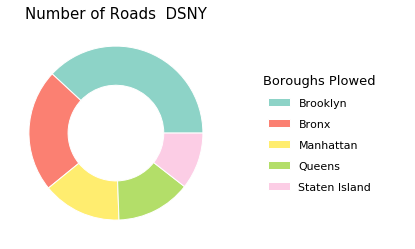

In [0]:
from matplotlib.pyplot import figure as fig
fig(num=None, figsize=(18, 16), dpi=300)
fig, ax = plt.subplots()

size = 0.45
vals = num_roads

cmap = plt.get_cmap("Set3")
outer_colors = cmap(np.array([0, 3, 11, 6, 7]))
# inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

# ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
#        wedgeprops=dict(width=size, edgecolor='w'))

ingredients = ['Brooklyn',
          'Bronx',
          'Manhattan',
          'Queens',
          'Staten Island']
ax.legend(ingredients,
          title="Boroughs Plowed",
          title_fontsize=13,
          loc="center left",
          labelspacing=1,
          borderpad=3,
          bbox_to_anchor=(1, 0, 0.5, 1), frameon=False,fontsize=11)

ax.set_title(label='Number of Roads  DSNY',fontname="Corbel",fontsize=15)
plt.show()

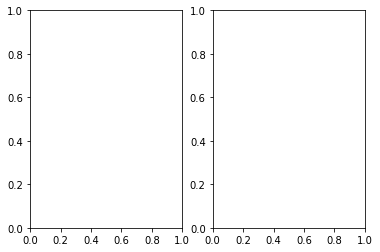

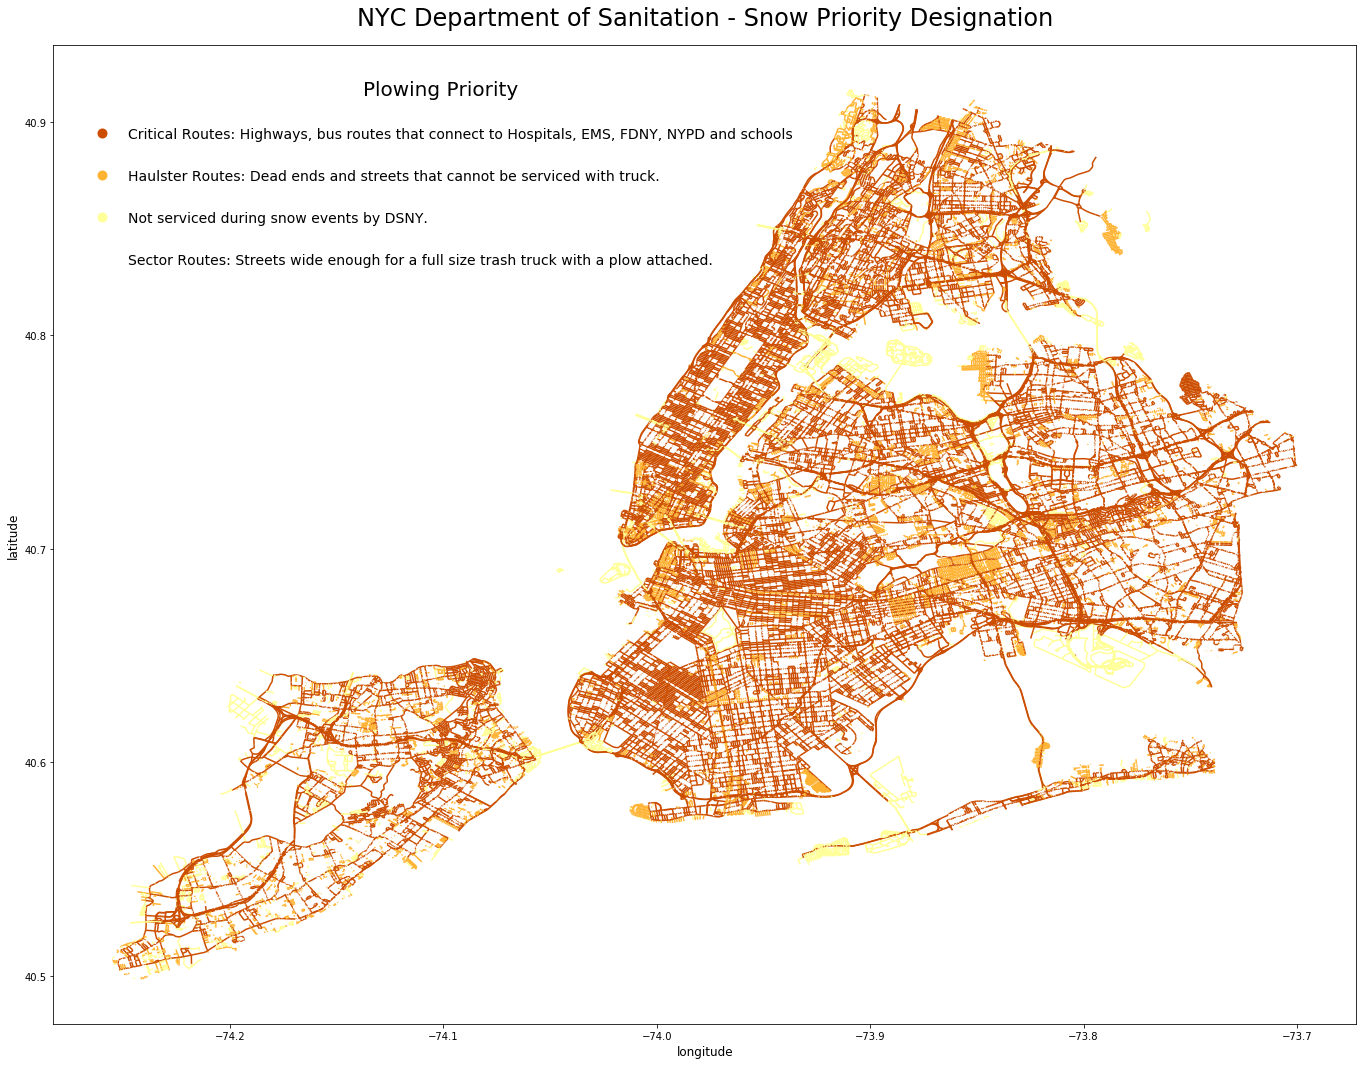

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('afmhot')
new_cmap = truncate_colormap(cmap, .4, 1)


roads.plot(column='snow_prior',figsize=(24, 18), cmap = new_cmap, legend=True, legend_kwds={"frameon": False, "title": "Plowing Priority", "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
plt.title("NYC Department of Sanitation - Snow Priority Designation", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=24);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

In [0]:
roads_path = '/content/drive/My Drive/Colab Notebooks/Maps/geo_export_153dc54c-ea8f-43ec-b604-0bee92530280.shp'
roads = gpd.read_file(roads_path, encoding='utf-8')
# roads = roads[roads['segmentlen']> 500]#makes cool art
roads.head(2)

,accessible,avgtravtim,b5_sc,b7_sc,bike_lane,borough_in,boroughcod,bphys_id,collection,continuous,created_by,date_creat,time_creat,fcc,fire_lane,from_level,joinid,l_blockfac,l_high_hn,l_low_hn,l_zip,lsubsect,modified_b,date_modif,time_modif,nominaldir,nonped,physicalid,posted_spe,r_blockfac,r_high_hn,r_low_hn,r_zip,rsubsect,rw_type,rwjurisdic,sandist_in,seglocstat,segmentlen,shape_leng,snow_prior,special_di,status,stname_lab,streetwi_1,streetwidt,to_level_c,trafdir,truck_rout,twisted_pa,within_bnd,geometry
0,None,0.0,305280,30528001,None,None,3,0.0,None,None,DCP,2007-11-29,00:00:00.000,None,None,13.0,None,0.0,43,25,11217,2K,csarkissian,2012-02-27,00:00:00.000,None,None,37785.0,0.0,0.0,44,28,11217,2K,1.0,None,None,None,260.109118,260.109153,P,None,2,3 AV,None,0.0,13.0,TF,None,N,None,"LINESTRING (-73.98027 40.68596, -73.98070 40.6..."
1,None,0.0,447390,44739001,None,None,4,0.0,None,None,CSCL,2009-06-16,00:00:00.000,None,None,13.0,None,92260988.0,None,None,11375,1D,BlockfaceID_LOAD,2015-11-07,00:00:00.000,None,V,7141.0,0.0,92269516.0,None,None,11375,1D,2.0,None,None,None,650.954864,650.954853,P,None,2,GRAND CENTRAL PKWY,None,45.0,13.0,FT,None,N,None,"LINESTRING (-73.84554 40.73966, -73.84537 40.7..."


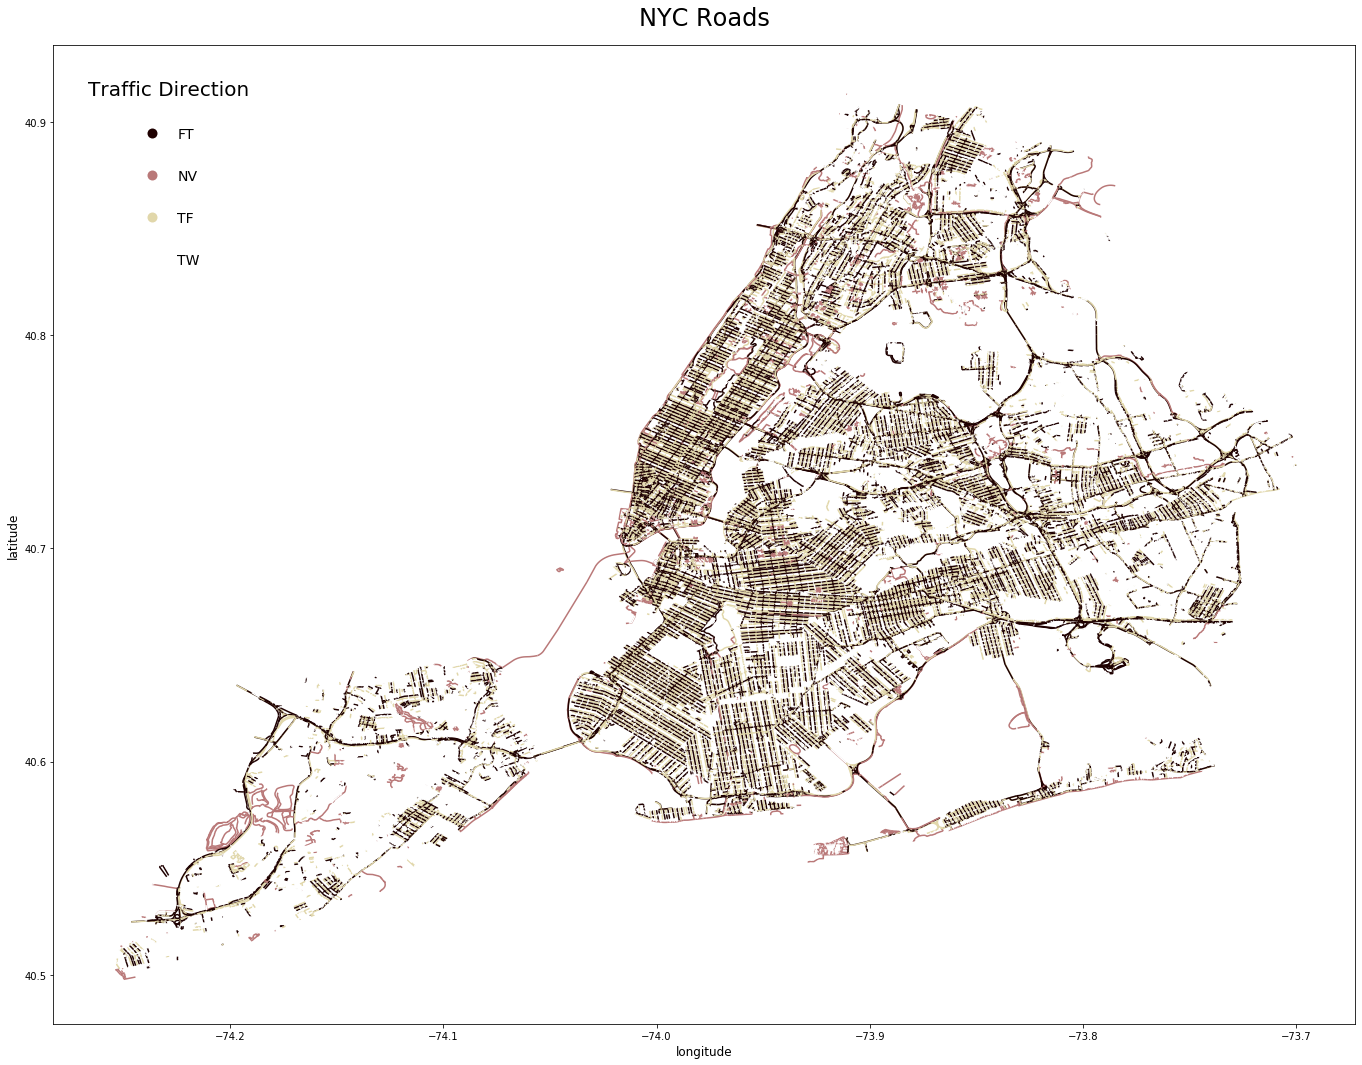

In [0]:

# def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
#     new_cmap = colors.LinearSegmentedColormap.from_list(
#         'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
#         cmap(np.linspace(minval, maxval, n)))
#     return new_cmap

# arr = np.linspace(0, 50, 100).reshape((10, 10))
# fig, ax = plt.subplots(ncols=2)

# cmap = plt.get_cmap('afmhot')
# new_cmap = truncate_colormap(cmap, .4, 1)


roads.plot(column='trafdir',figsize=(24, 18), cmap = 'pink', legend=True, legend_kwds={"frameon": False, "title": "Traffic Direction", "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
plt.title("NYC Roads", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=24);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

In [0]:
roads_path = '/content/drive/My Drive/Colab Notebooks/Maps/All_Truck_Routes_NYC_Lion14A.shp'
roads = gpd.read_file(roads_path, encoding='utf-8')
# roads = roads[roads['segmentlen']> 500]#makes cool art
roads.head(2)

,OBJECTID,Street,SAFStreetN,FeatureTyp,SegmentTyp,IncExFlag,RB_Layer,NonPed,TrafDir,TrafSrc,SpecAddr,FaceCode,SeqNum,StreetCode,SAFStreetC,LGC1,LGC2,LGC3,LGC4,LGC5,LGC6,LGC7,LGC8,LGC9,BOE_LGC,SegmentID,SegCount,LocStatus,LZip,RZip,LBoro,RBoro,L_CD,R_CD,LATOMICPOL,RATOMICPOL,LCT2010,LCT2010Suf,RCT2010,RCT2010Suf,...,NodeLevelT,ConParity,Twisted,RW_TYPE,PhysicalID,GenericID,NYPDID,FDNYID,LBlockFace,RBlockFace,LegacyID,Status,StreetWidt,StreetWi_1,BikeLane,Snow_Prior,FCC,ROW_Type,LLo_Hyphen,LHi_Hyphen,RLo_Hyphen,RHi_Hyphen,FromLeft,ToLeft,FromRight,ToRight,Join_ID,TruckRoute,RouteType,Descriptio,Restrictio,NYC_Reg,LtdLocal,ThruExwy,LocalBrg,LocalTunl,ThruBrg,ThruTunl,Shape_Leng,geometry
0,1,TRINITY PLACE,None,0,U,None,B,None,W,DOT,None,4435,00050,132615,None,01,None,None,None,None,None,None,None,None,1,0112585,1,None,10006,10006,1,1,101,101,207,206,13,None,13,None,...,M,None,None,1,77,61,None,None,None,None,0112585,2,0.0,None,None,P,None,None,92,94,91,95,92,94,91,95,1443501000000,Y,Local,Manhattan Local Truck Route Network,None,"NYCDOT Traffic Rules, Section 4-13-(d)(2)",None,None,None,None,None,None,61.384654,"LINESTRING (980855.223 197527.155, 980883.065 ..."
1,2,WATER STREET,None,0,U,None,B,None,T,DOT,None,4635,00020,133490,None,01,None,None,None,None,None,None,None,None,1,0023016,1,None,10004,10004,1,1,101,101,202,214,9,None,9,None,...,M,None,None,1,115,98,None,None,None,None,0023016,2,0.0,None,None,P,None,None,6,20,7,21,6,20,7,21,1463501000000,Y,Local,Manhattan Local Truck Route Network,None,"NYCDOT Traffic Rules, Section 4-13-(d)(2)",None,None,None,None,None,None,243.748254,"LINESTRING (980827.537 195309.728, 981059.839 ..."


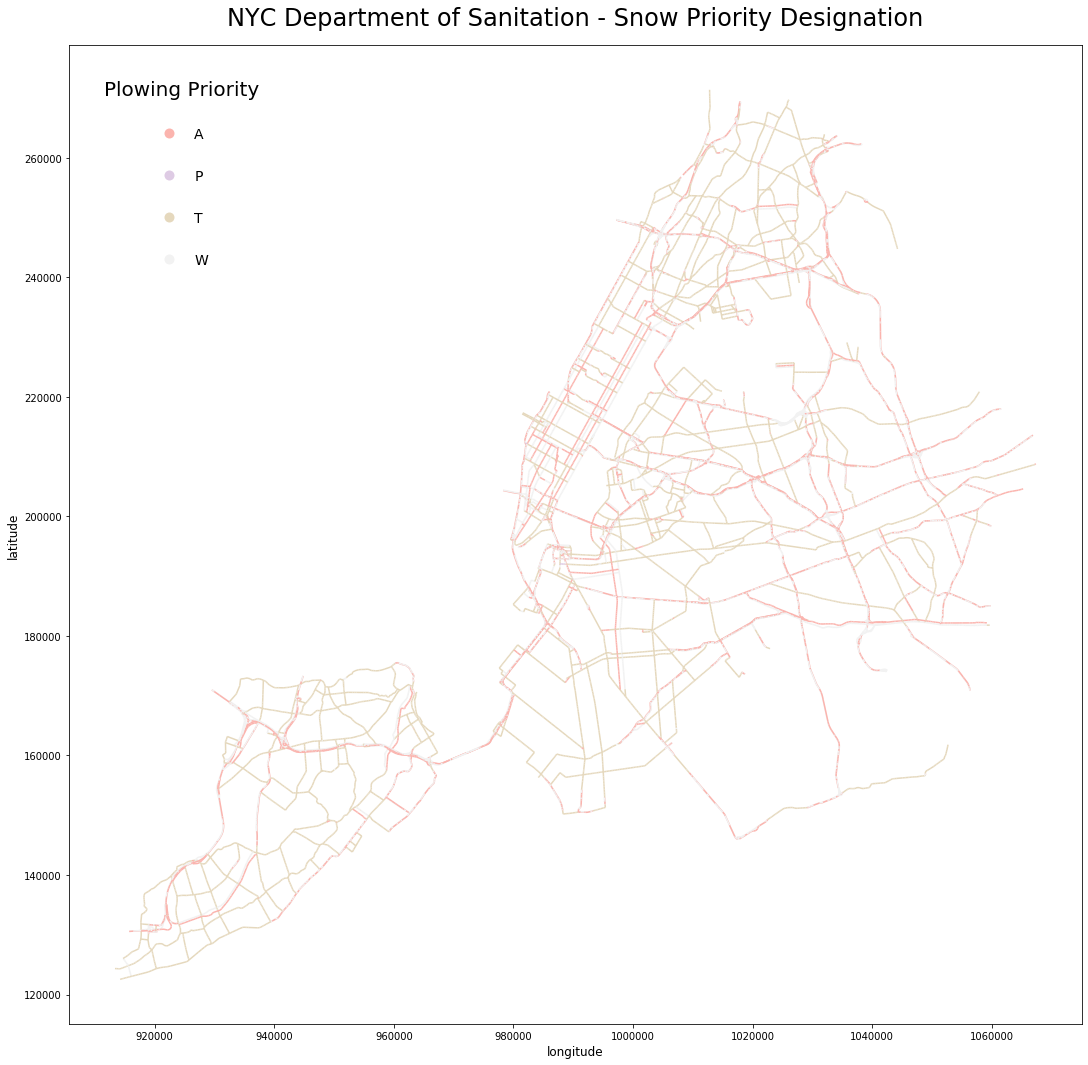

In [0]:
roads.plot(column='TrafDir',figsize=(24, 18), cmap = 'Pastel1', legend=True, legend_kwds={"frameon": False, "title": "Plowing Priority", "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});
plt.title("NYC Department of Sanitation - Snow Priority Designation", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=24);
plt.ylabel("latitude", fontsize=12);
plt.xlabel("longitude", fontsize=12);

In [0]:
from descartes import PolygonPatch
import shapefile
from matplotlib.lines import Line2D

shp_path = '/content/drive/My Drive/Colab Notebooks/Maps/ZIP_CODE_040114.shp'
shpNTA = gpd.read_file(shp_path)
# shp_shape = shp.to_crs({'init': 'epsg:4326'})
# shp_shape.boundary.plot()
shpNTA.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


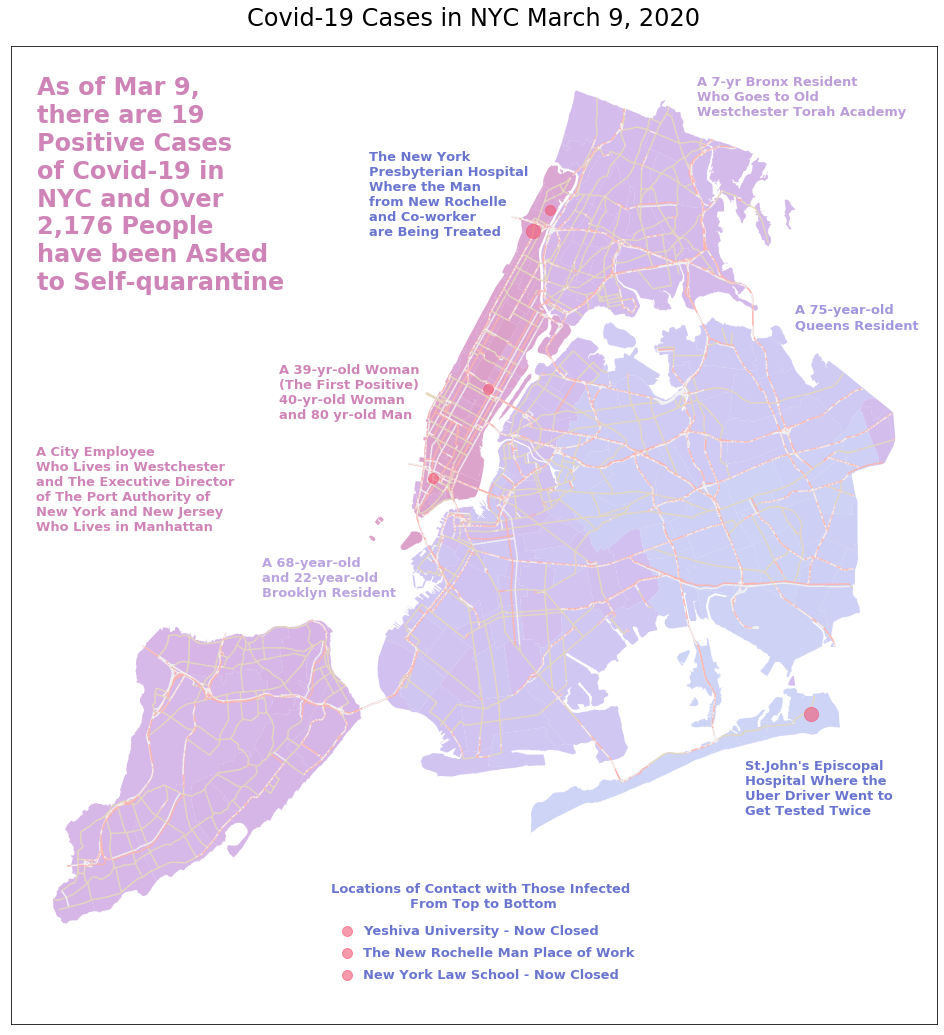

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


cmap = plt.get_cmap('cubehelix')#bone YlGnBu
new_cmap = truncate_colormap(cmap, 0.65, 0.8)#.55, .8  .45, .85

# sf=shapefile.Reader('/content/drive/My Drive/Colab Notebooks/Maps/ZIP_CODE_040114.shp')
fig, ax = plt.subplots(figsize = (18,18)) 
shpNTA.plot(ax=ax, cmap=new_cmap, column='ZIPCODE', legend=False, alpha = .8, legend_kwds={"frameon": False, "loc":"upper left", "title_fontsize":20, "mode":None,"labelspacing":2,"borderpad":2, "prop":{"family":"Corbel", "size":14}});

roads.plot(ax=ax, column='TrafDir', cmap = 'Pastel1', legend=True, alpha=1, zorder = 3) #0.45

plt.title("Covid-19 Cases in NYC March 9, 2020", fontdict={"family":"Corbel"}, pad=20, fontname="Corbel", size=24);
ax.get_legend().remove();
ax.text(x=971050,y=246000, s="The New York \nPresbyterian Hospital \nWhere the Man \nfrom New Rochelle \nand Co-worker \nare Being Treated", fontsize=13, fontweight='bold', color=('#6975cf'));
ax.text(x=1040000,y=140000, s="St.John's Episcopal \nHospital Where the \nUber Driver Went to \nGet Tested Twice", fontsize=13, fontweight='bold', color=('#6975cf'));
ax.text(x=1031100,y=268100, s="A 7-yr Bronx Resident \nWho Goes to Old \nWestchester Torah Academy", fontsize=13, fontweight='bold', color=('#bc9cd9'));
ax.text(x=1049100,y=229000, s="A 75-year-old \nQueens Resident", fontsize=13, fontweight='bold', color=('#a097de'));
ax.text(x=951500,y=180000, s="A 68-year-old \nand 22-year-old \nBrooklyn Resident", fontsize=13, fontweight='bold', color=('#baa4e0'));
ax.text(x=910100,y=192000, s="A City Employee \nWho Lives in Westchester \nand The Executive Director \nof The Port Authority of \nNew York and New Jersey \nWho Lives in Manhattan", fontsize=13, fontweight='bold', color=('#cf84b8'));
ax.text(x=954600,y=212500, s="A 39-yr-old Woman\n(The First Positive) \n40-yr-old Woman \nand 80 yr-old Man", fontsize=13, fontweight='bold', color=('#cf84b8'));


ax.text(x=910300,y=236200, s="As of Mar 9, \nthere are 19 \nPositive Cases \nof Covid-19 in \nNYC and Over \n2,176 People \nhave been Asked \nto Self-quarantine", fontsize=24, fontweight='bold', color=('#cf84b8'));

x = 1001050
y = 247000
plt.scatter(x, y, s = 200, c='#f25773', alpha=.6, zorder = 5)

x = 1052000
y = 158500
plt.scatter(x, y, s = 200, c='#f25773', alpha=.6, zorder = 4)

x = 992900
y = 217900
plt.scatter(x, y, s = 100, c='#f25773', alpha=.6, zorder = 4)

x = 982800
y = 201600
plt.scatter(x, y, s = 100, c='#f25773', alpha=.6, zorder = 4)

x = 1004300
y = 250700
plt.scatter(x, y, s = 100, c='#f25773', alpha=.6, zorder = 4)

ax.text(x=992000,y=123000, s="Locations of Contact with Those Infected \nFrom Top to Bottom", fontsize=13, fontweight='bold', color=('#6975cf'), ha = 'center');

x = 967000
y = 118600
plt.scatter(x, y, s = 100, c='#f25773', alpha=.6, zorder = 4)
ax.text(x=970000,y=118000, s="Yeshiva University - Now Closed", fontsize=13, fontweight='bold', color=('#6975cf'));
x = 967000
y = 114600
plt.scatter(x, y, s = 100, c='#f25773', alpha=.6, zorder = 4)
ax.text(x=970000,y=114000, s="The New Rochelle Man Place of Work", fontsize=13, fontweight='bold', color=('#6975cf'));
x = 967000
y = 110600
plt.scatter(x, y, s = 100, c='#f25773', alpha=.6, zorder = 4)
ax.text(x=970000,y=110000, s="New York Law School - Now Closed", fontsize=13, fontweight='bold', color=('#6975cf'));

ax.set_xticks([]) 
ax.set_yticks([]) 


plt.savefig("Covid-19_Cases_NYC_2020-03-09",transparent=True)


plt.show();

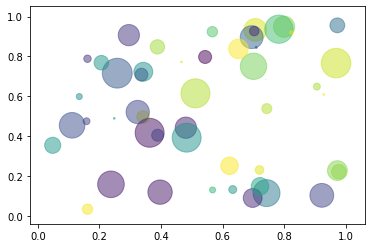

In [0]:
#Reference

import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [0]:
#Notes

# Mar 1 39-yr old healthcare worker positive in home recently travelled to Iran

# Mar 3rd New Rochelle Man Works at Lewis+and+Garbuz,+P.C.+Attorneys+and+Counsellors+at+Law/@40.7520703,-73.978729,15z/data=!4m5!3m4!1s0x0:0x93e05e9052daee4b!8m2!3d40.7520703!4d-73.978729
#   New Rochelle Man Being Treated, 50-year-old Midtown lawyer in contact with New Rochelle man 40.7098731,-73.7360172/NewYork-Presbyterian+%2F+Columbia+University+Medical+Center,
#   New Rochelle Man's son: Yeshiva+University/@40.8505994,-73.929327 closed
#   New Rochelle Man's child: New+York+Law+School/@40.717982,-74.006988 closed
#   New Rochelle lawyer's wife, son and daughter

# Mar 5 40yr old man and 80 yr old woman

# Mar 6 Uber Driver - St.+John's+Episcopal+Hospital 40.5992598,-73.7532906

# Mar 8 7-yr Bronx Resident old Westchester Torah Academy

# Mar 9 a city employee who lives in Westchester
# two in Brooklyn and one in Queens - Monday morning. He added more details Monday afternoon, 
# identifying them as a 68-year-old Brooklyn resident , a 22-year-old Brooklyn resident and a 
# 75-year-old Queens resident. De Blasio says all three are in the hospital, and says the 
# 68-year-old man and 75-year-old man are both in the ICU. He says the 68-year-old man has 
# both diabetes and heart disease, and the 75-year-old man has diabetes.
# Rick Cotton, the executive director of Port Authority of New York and New Jersey, who lives in Manhattan.
# A City Employee Who Lives in Westchester and The Executive Director of Port Authority of New York and New Jersey Who Lives in Manhattan



# 12 as of Mar 8
# As of Mar 9 Over 2,176 people have been asked to be in self-quarantine, 19 in mandatory quarantine
# 19 as of Mar 9

# 89 total in state saturday

# spectrum news ny1, packed
# amny
# gothamnist

SyntaxError: ignored